# Understanding the Hotel Booking Data
This dataset provides information about hotel reservations from 2015 to 2017 for two types of hotels:

### 1.City Hotel (Urban hotels, likely for business travelers)
### 2.Resort Hotel (Vacation hotels, likely for leisure travelers)
By analyzing this data, we can extract key insights about customer behavior, booking patterns, cancellations, and financial trends.

# 1. Key Observations
### A. Booking Trends
     1.Guests book both City Hotels and Resort Hotels, but we need to check which one is more popular.
     2.Seasonality: Booking volumes vary across months—likely peaking during holidays or vacation seasons.
     3.Lead Time: Some guests book months in advance, while others book last minute. This could impact hotel revenue management.

    
# B. Cancellation Patterns
### 1.is_canceled tells us whether a booking was canceled.
### 2.Factors affecting cancellations:
      a.Lead time: The longer the lead time, the more likely a guest is to cancel.
      b.Deposit type: Guests with no deposit might cancel more frequently.
      c.Repeated guests: Likely to cancel less often.
      d.Market segment: Online bookings may have a higher cancellation rate than corporate or direct bookings.
# C. Customer Behavior
    1.Transient guests (individual travelers) dominate bookings.
    2.Some bookings are for families (adults, children, babies), while others are for solo travelers.
    3.Special requests (total_of_special_requests) indicate customer preferences, like room type, extra beds, or parking spaces.
# D. Revenue Insights
    1.adr (Average Daily Rate) helps track revenue per booking.
    2.Higher ADR means higher revenue, but cancellations and seasonal discounts affect the final earnings.
    3.Resort Hotels may have a higher ADR during peak seasons, while City Hotels may have a more stable ADR year-round.
    
# 2. Key Questions for Analysis
    To get the most from this dataset, we should explore:

    1.Which hotel type gets more bookings?
    2.What are the peak months for hotel stays?
    3.What factors influence cancellations?
    4.How does ADR vary between hotel types and seasons?
    5.Do repeated guests behave differently than new guests?
    
# Next Steps for Analysis
    1.Data Cleaning: Handle missing values (agent, company, children).
    2.Exploratory Data Analysis (EDA):
     a.Visualizing trends using Matplotlib & Seaborn.
     b.Checking correlations between features.

# Import Libraries 

In [1]:
import pandas as pd # for data cleaning and manipution
import numpy as np # numerical data opration
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns  # data visualisation
import warnings   # for handaling warning 
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
# data reading
df = pd.read_csv("D:/Downloads/hotel_bookings 2.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# Exploratory Data Analysis And Data Cleaning 

In [3]:
# data shape
df.shape

(119390, 32)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# data info
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# converting reservation status date datatype object to datetime 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],format="%d/%m/%Y")

In [7]:
df.describe(include = 'object')  # return basic statistics of object columns

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [8]:
for col in df.describe(include='object').columns:  # Loop through categorical columns
    print(col)  
    print(df[col].unique())  # Get unique values of the column
    print("\n")  # Print a newline for better readability

hotel
['Resort Hotel' 'City Hotel']


arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


meal
['BB' 'FB' 'HB' 'SC' 'Undefined']


country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ET

In [9]:
df.isnull().sum() # chacking Nan vLaues

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Droping the columns and Nan values from data

In [10]:
# Droping columns beacuse columns containing more then 100000+ Nan Values
df.drop(['company','agent'],axis = 1, inplace = True)
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


# Outlier Handling

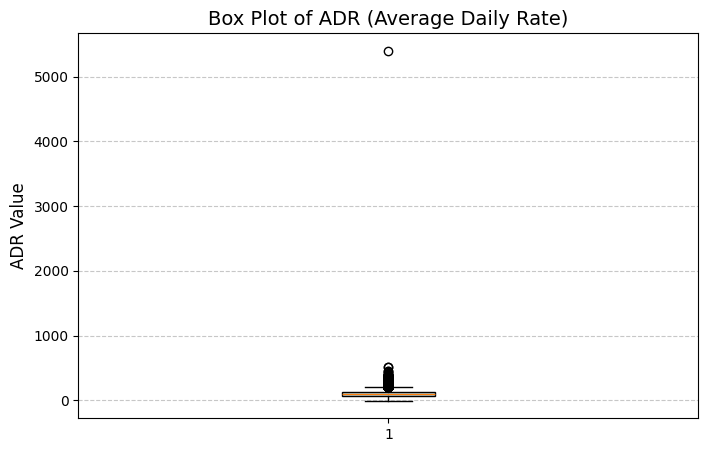

In [13]:
# There is outlier in df['adr'] column 
plt.figure(figsize=(8, 5))  # Set figure size
plt.boxplot(df['adr'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))  # Customize box color
plt.title("Box Plot of ADR (Average Daily Rate)", fontsize=14)  # Add title
plt.ylabel("ADR Value", fontsize=12)  # Label y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()


#### this is clearly visible df['adr'] column has a outlier

In [14]:
# removing outlier while fitering
df =df[df['adr']<5000]

# Data Analysis and Visualizations

In [15]:
# chacking persentage of cancelled booking
cancelled_perc = (df['is_canceled'].value_counts(normalize = True))*100
cancelled_perc

is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64

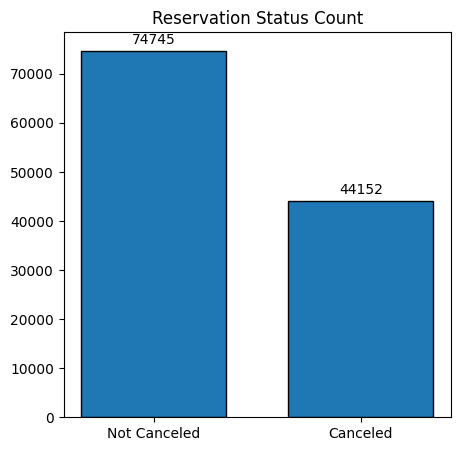

In [16]:
# creating bar chart 
plt.figure(figsize=(5, 5))
plt.title('Reservation Status Count')

# Create bar chart
bars = plt.bar(
    ['Not Canceled', 'Canceled'],  # X-axis labels
    df['is_canceled'].value_counts(),  # Y-axis values (count of each category)
    edgecolor='k',  # Black border around bars
    width=0.7  # Adjusts the bar width
)

# Add value labels on top of bars
plt.bar_label(bars, fmt='%d', fontsize=10, padding=3)

plt.show()


#### The "Not Canceled" category has a higher count (74,745) compared to the "Canceled" category (44,152). but the Cancelation number are high this is 37% of total order it should be control

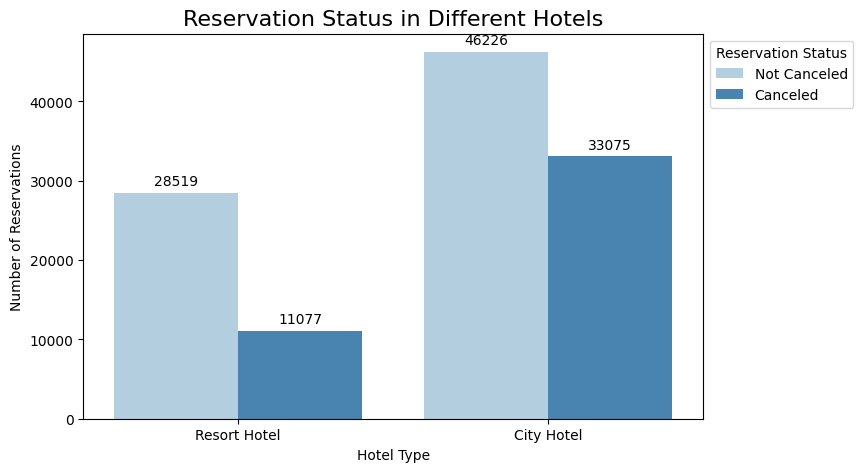

In [17]:
# creating countplot to show cancellation in city and resort both hotal
plt.figure(figsize=(8, 5))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')

# Adjusting the legend position and setting labels
legend_labels = ['Not Canceled', 'Canceled']
ax1.legend(title="Reservation Status", labels=legend_labels, bbox_to_anchor=(1, 1), loc="upper left")

# Adding data labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.title('Reservation Status in Different Hotels', size=16)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Reservations')

plt.show()


In [18]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)*100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [19]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)*100

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

## Insights from the Chart:
    1.City hotels have more reservations overall compared to resort hotels.
    2.City hotels also have a higher cancellation rate (33,075 canceled vs. 46,226 not canceled).
    3.Resort hotels have a lower number of cancellations (11,077 canceled vs. 28,519 not canceled).
    4.Cancellation rates are higher for city hotels compared to resort hotels.

In [20]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

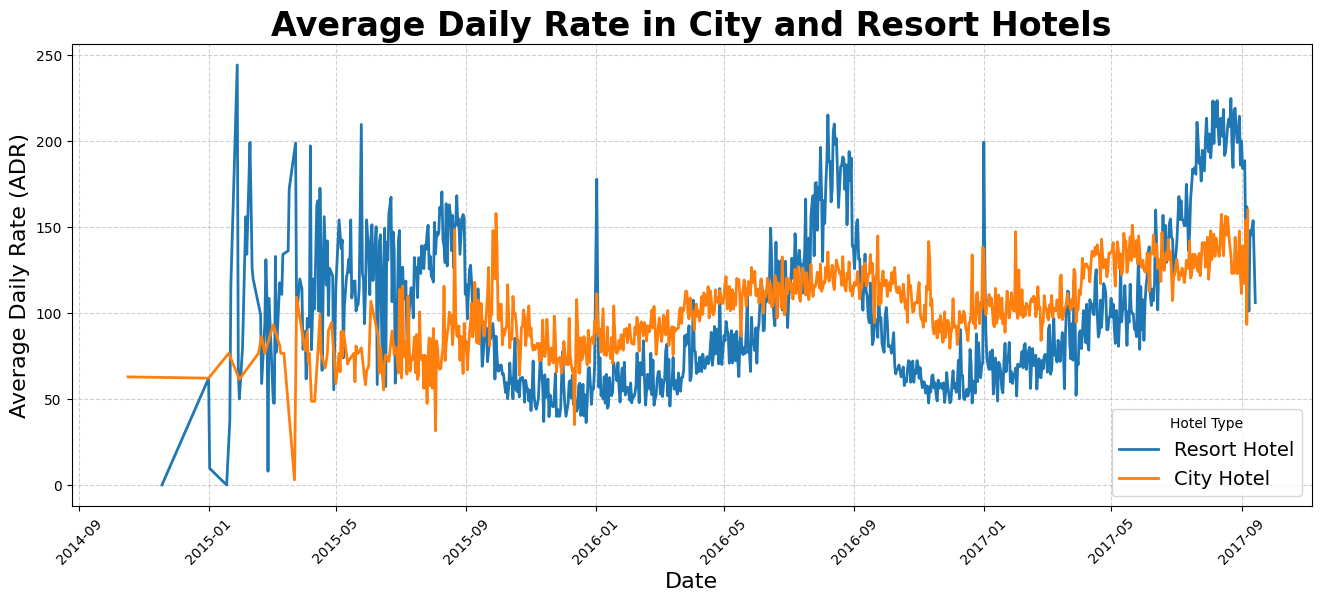

In [21]:
plt.figure(figsize=(16, 6))  # Adjust figure size
plt.title('Average Daily Rate in City and Resort Hotels', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Average Daily Rate (ADR)', fontsize=16)

# Plot data with markers for better visibility
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel', linestyle='-', linewidth=2)
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel', linestyle='-', linewidth=2)

plt.legend(fontsize=14, title="Hotel Type")
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## City Hotels (Orange Line) have a more stable ADR

    1.The price fluctuates within a limited range.
    2.The variation is smaller compared to resort hotels.
## Resort Hotels (Blue Line) show high volatility

    1.The ADR fluctuates significantly over time.
    2.There are sharp peaks and drops, which could be due to seasonality, holidays, or demand spikes.


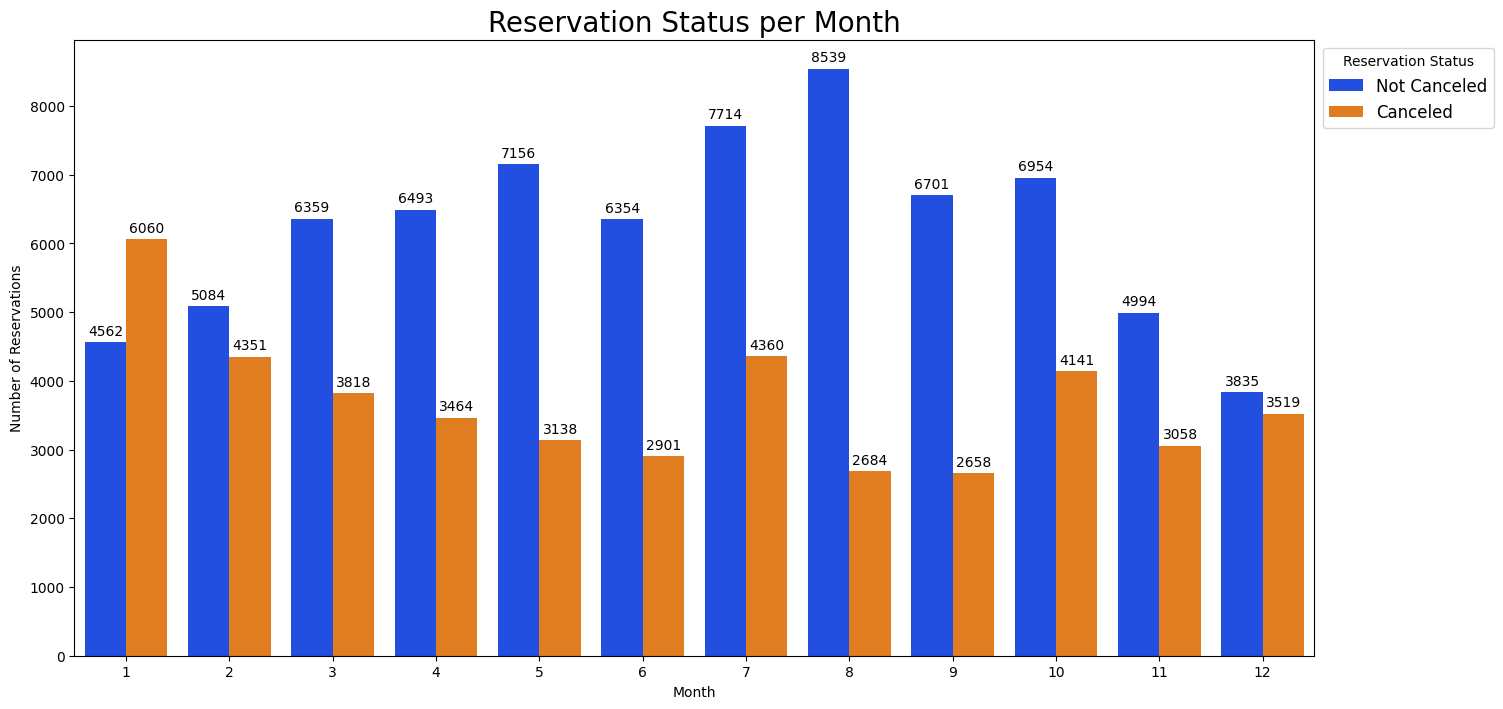

In [22]:
# Extracting month from the reservation date
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')

# Setting legend with proper labels
legend_labels = ['Not Canceled', 'Canceled']
ax1.legend(title="Reservation Status", labels=legend_labels, bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)

# Adding data labels on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.title('Reservation Status per Month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')

plt.show()

## January has the highest number of cancellations (6060)

    1.This suggests a high dropout rate in bookings at the beginning of the year.
## July and August have the highest number of successful reservations

    1.July: 7,714 not canceled bookings
    2.August: 8,539 not canceled bookings
    3.This could indicate peak vacation season, leading to high demand.
## Cancellations are relatively lower in the second half of the year

    1.The lowest cancellation count is in September (2658).
    2.People may be more committed to their bookings in these months.
## June and July show a spike in cancellations

    1.June: 2,901 cancellations
    2.July: 4,360 cancellations
    3.Possibly due to seasonal fluctuations, pricing, or customer uncertainty.
## December has nearly equal bookings and cancellations

    1.Not Canceled: 3,835
    2.Canceled: 3,519
    3.The ratio is much closer than other months, suggesting holiday season uncertainty.


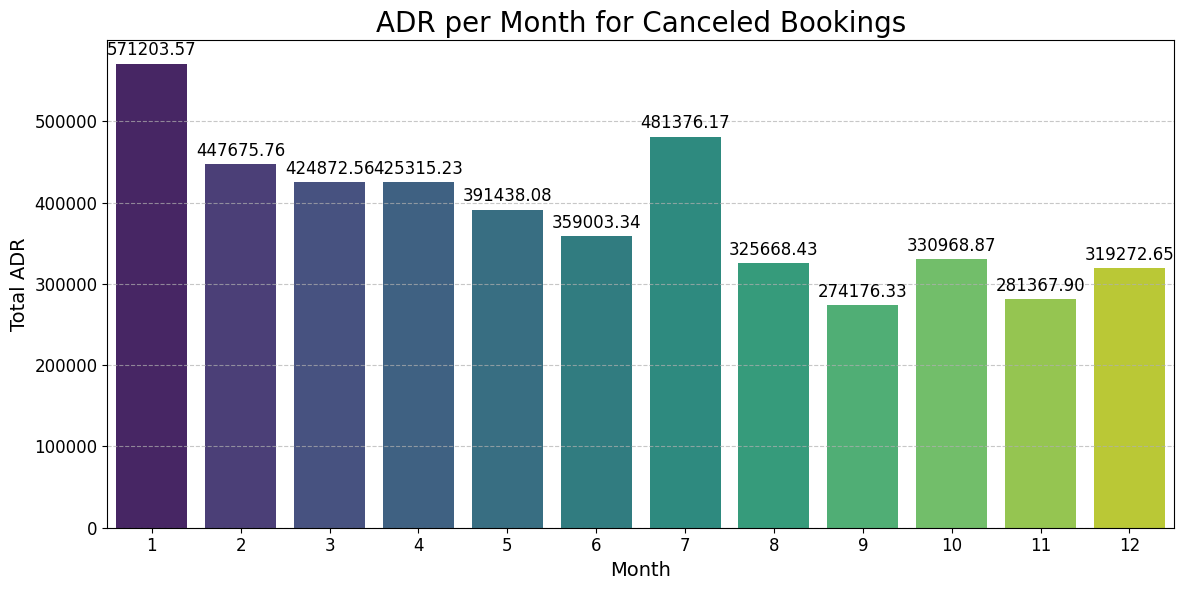

In [24]:
# Grouping ADR by month for canceled bookings
grup_month_of_canceled = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

# Set figure size
plt.figure(figsize=(12, 6))

# Set title
plt.title('ADR per Month for Canceled Bookings', fontsize=20)

# Create bar plot
ax_1 = sns.barplot(x='month', y='adr', palette='viridis', data=grup_month_of_canceled)

# Label axes
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total ADR", fontsize=14)

# Add value labels to bars
for container in ax_1.containers:
    ax_1.bar_label(container, fmt='%.2f', padding=3, fontsize=12)

# Improve layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


## Observations:
    1.January has the highest canceled ADR (~571,203.57), meaning it had the highest potential revenue loss due to cancellations.
    2.July also has a significant peak (~481,376.17), suggesting high cancellations during peak travel seasons.
    3.September and November have the lowest canceled ADR (~274,176.33 & ~281,367.90), indicating fewer cancellations or lower ADR in these months.
## Possible Interpretations:
    1.The higher cancellation ADR in January and July could be due to peak holiday seasons where more people book hotels in advance but later cancel.
    2.The lower values in September and November could suggest a lower travel demand period, leading to fewer cancellations.

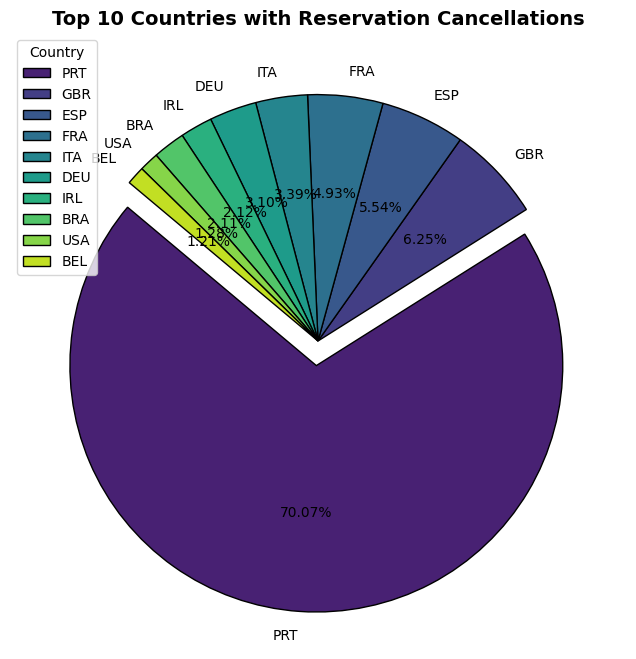

In [25]:
# Filter canceled reservations
cancelled_data = df[df['is_canceled'] == 1]

# Get the top 10 countries with the most cancellations
top_10_country = cancelled_data['country'].value_counts().head(10)

# Define colors using seaborn's viridis palette
colors = sns.color_palette('viridis', len(top_10_country))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with Reservation Cancellations', fontsize=14, fontweight='bold')

# Explode the largest segment slightly
explode = [0.1 if i == 0 else 0 for i in range(len(top_10_country))]

# Create the pie chart
plt.pie(top_10_country, autopct='%.2f%%', labels=top_10_country.index, 
        colors=colors, explode=explode, startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a legend for clarity
plt.legend(title="Country", loc="best")

# Display the chart
plt.show()


## Key Observations:
### Portugal (PRT) Dominates

    a.The largest portion of cancellations (70.07%) comes from Portugal (PRT).
    b.This slice is exploded (separated) to highlight its significance.
### Other Countries with Notable Cancellations

    a.United Kingdom (GBR): 6.25%
    b.Spain (ESP): 5.54%
    c.France (FRA): 4.93%
    d.Italy (ITA): 3.39%
    e.Germany (DEU): 3.10%
    f.The remaining countries (Ireland, Brazil, USA, and Belgium) have much smaller shares.


In [26]:
# value count of diffrent market segment 
# count of total pay mode
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [27]:
df['market_segment'].value_counts(normalize = True)*100

market_segment
Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: proportion, dtype: float64

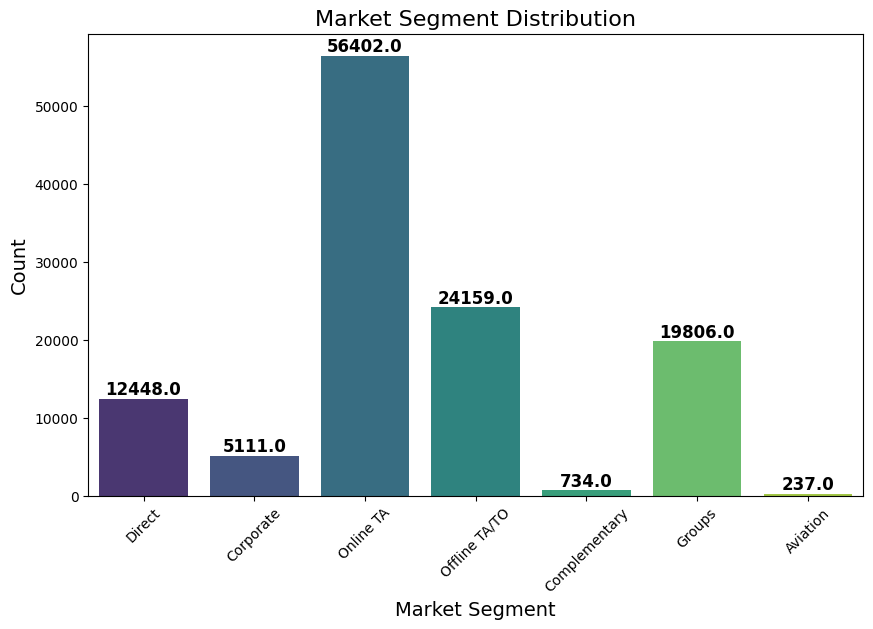

In [28]:
# Plot countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['market_segment'], palette='viridis')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Market Segment Distribution', fontsize=16)
plt.show()


#### Online Travel Agencies (TA) Dominate – The majority of bookings (47.44%) come from Online TA, with a count of 56,402. This indicates a strong reliance on online platforms for reservations.

#### Offline TA/TO is the Second Largest Segment – Offline travel agents and tour operators contribute 20.32% of the bookings, with a count of 24,159, showing that traditional travel agencies still hold significant market share.

In [29]:
# value counts of cancelled booking market_segment
cancelled_booking =cancelled_data['market_segment'].value_counts()
cancelled_booking

market_segment
Online TA        20738
Groups           12097
Offline TA/TO     8277
Direct            1920
Corporate          978
Complementary       90
Aviation            52
Name: count, dtype: int64

In [30]:
cancelled_data['market_segment'].value_counts(normalize = True)*100

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: proportion, dtype: float64

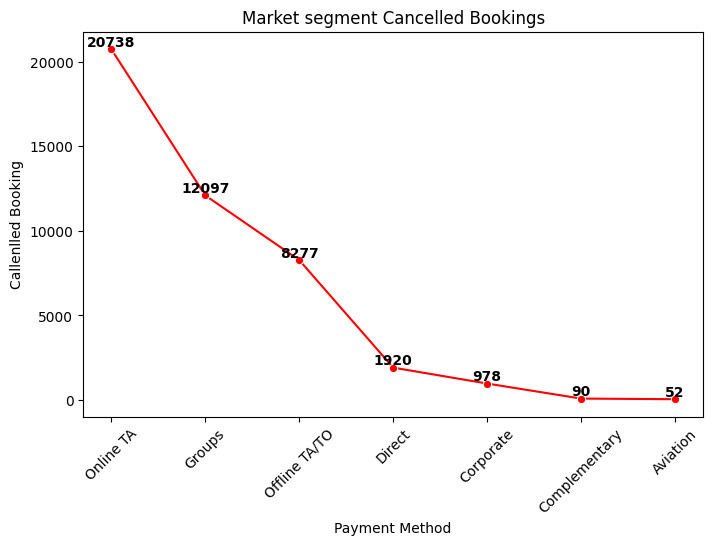

In [56]:
# Plot the line graph
plt.figure(figsize=(8, 5))
ax_1 = sns.lineplot(x=cancelled_booking.index, y=cancelled_booking.values,marker = 'o',color = 'r')

# Add value labels to bars
for x, y in zip(cancelled_booking.index, cancelled_booking.values):
    ax_1.text(x, y, str(y), ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.xlabel("Payment Method")  # Label for x-axis
plt.ylabel("Callenlled Booking")  # Label for y-axis
plt.title("Market segment Cancelled Bookings")  # Title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()


#### Online Travel Agencies (TA) Lead the Market – The majority of bookings (46.97%, count: 20,738) come from Online TA, confirming that online platforms remain the most dominant booking channel.

#### Significant Growth in Group Bookings – Group bookings account for 27.40% (12,097 bookings), which is a higher proportion compared to the previous dataset (16.66%). This suggests an increasing demand for group travel, possibly due to corporate events, tours, or large gatherings.

#### Offline TA/TO Decline – Offline travel agents and tour operators contribute 18.75% (8,277 bookings), which is relatively lower than the earlier dataset (20.32%). This might indicate a shift from traditional booking methods to digital platforms.

#### Direct Bookings Remain Low – Direct bookings account for only 4.35% (1,920 bookings), reinforcing the reliance on third-party platforms for reservations. There is room for improvement in direct sales strategies to reduce dependency on intermediaries.



# Key Business Takeaways & Recommendations
    ✅ Strengthen digital presence – Focus on SEO, social media marketing, and mobile booking optimizations to attract modern travelers.
    ✅ Encourage direct bookings – Provide exclusive deals, flexible policies, and loyalty rewards to increase direct reservations.
    ✅ Capitalize on group bookings – Develop custom packages for weddings, conferences, and tour groups to further grow this segment.
    ✅ Expand corporate offerings – Offer business-friendly facilities and partner with organizations to increase corporate stays.
    ✅ Reduce dependency on OTAs – While OTA bookings are high, balancing it with direct bookings will improve revenue margins.

